# Programming Assignment

## Model validation on the Iris dataset

In [60]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
%matplotlib inline
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

# If you would like to make further imports from tensorflow, add them here



#### The Iris dataset

In this assignment, you will use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). It consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For a reference, see the following papers:

- R. A. Fisher. "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188, 1936.

Your goal is to construct a neural network that classifies each sample into the correct class, as well as applying validation and regularisation techniques.

#### Load and preprocess the data

First read in the Iris dataset using `datasets.load_iris()`, and split the dataset into training and test sets.

In [34]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    
    If you would like to import any further packages to aid you in this task, please do so in the 
    Package Imports cell above.
    """
    targets = iris_data["target"]
    data = iris_data["data"]
    train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

    return train_data, test_data, train_targets, test_targets
    

In [36]:
# Run your function to generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

We will now convert the training and test targets using a one hot encoder.

In [37]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Build the neural network model


In [50]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = Sequential()
    model.add(Dense(64, activation = 'relu', kernel_initializer = "he_uniform", bias_initializer = "ones", input_shape = (input_shape)))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    
    return model

In [51]:
# Run your function to get the model

model = get_model(train_data[0].shape)

#### Compile the model

You should now compile the model using the `compile` method. Remember that you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [53]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ["accuracy"])
    
    

In [54]:
# Run your function to compile the model

compile_model(model)

#### Fit the model to the training data


In [56]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(train_data, train_targets, epochs = epochs,
                       batch_size = 40, validation_split = 0.15, verbose = 2)
    return history

Run the following cell to run the training for 800 epochs.

In [57]:
# Run your function to train the model

history = train_model(model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 - 2s - loss: 1.1090 - accuracy: 0.3509 - val_loss: 1.0981 - val_accuracy: 0.2857
Epoch 2/800
114/114 - 0s - loss: 1.0773 - accuracy: 0.3509 - val_loss: 1.0732 - val_accuracy: 0.2857
Epoch 3/800
114/114 - 0s - loss: 1.0570 - accuracy: 0.4912 - val_loss: 1.0526 - val_accuracy: 0.6190
Epoch 4/800
114/114 - 0s - loss: 1.0381 - accuracy: 0.6842 - val_loss: 1.0330 - val_accuracy: 0.6190
Epoch 5/800
114/114 - 0s - loss: 1.0141 - accuracy: 0.6842 - val_loss: 1.0087 - val_accuracy: 0.7143
Epoch 6/800
114/114 - 0s - loss: 0.9897 - accuracy: 0.7193 - val_loss: 0.9866 - val_accuracy: 0.7143
Epoch 7/800
114/114 - 0s - loss: 0.9675 - accuracy: 0.7456 - val_loss: 0.9654 - val_accuracy: 0.8095
Epoch 8/800
114/114 - 0s - loss: 0.9450 - accuracy: 0.7807 - val_loss: 0.9447 - val_accuracy: 0.8095
Epoch 9/800
114/114 - 0s - loss: 0.9236 - accuracy: 0.7719 - val_loss: 0.9235 - val_accuracy: 0.8095
Epoch 10/800
114/114 - 0s - loss: 0.9009 - acc

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss


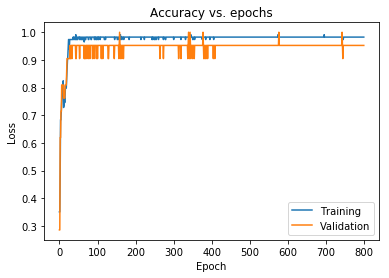

In [58]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

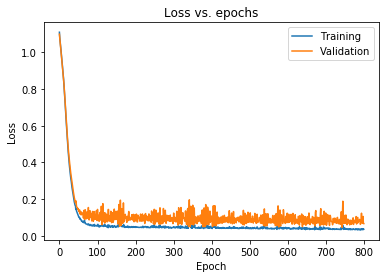

In [59]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh no! We have overfit our dataset. You should now try to now try to mitigate this overfitting.

#### Reducing overfitting in the model

In [61]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    model = Sequential()
    model.add(Dense(64, activation = 'relu', kernel_initializer = "he_uniform", bias_initializer = "ones", input_shape = (input_shape), kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    Dropout(dropout_rate)
    model.add(Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    BatchNormalization()
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    Dropout(dropout_rate)
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dense(3, activation = 'softmax'))
    
    return model
    

#### Instantiate, compile and train the model

In [62]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [63]:
# Compile the model

compile_model(reg_model)

In [64]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 - 2s - loss: 2.0773 - accuracy: 0.3158 - val_loss: 1.9768 - val_accuracy: 0.3810
Epoch 2/800
114/114 - 0s - loss: 1.9980 - accuracy: 0.3158 - val_loss: 1.9344 - val_accuracy: 0.3810
Epoch 3/800
114/114 - 0s - loss: 1.9525 - accuracy: 0.3158 - val_loss: 1.9045 - val_accuracy: 0.3810
Epoch 4/800
114/114 - 0s - loss: 1.9207 - accuracy: 0.3158 - val_loss: 1.8828 - val_accuracy: 0.3810
Epoch 5/800
114/114 - 0s - loss: 1.8980 - accuracy: 0.4561 - val_loss: 1.8659 - val_accuracy: 0.6667
Epoch 6/800
114/114 - 0s - loss: 1.8737 - accuracy: 0.5877 - val_loss: 1.8425 - val_accuracy: 0.6667
Epoch 7/800
114/114 - 0s - loss: 1.8505 - accuracy: 0.6316 - val_loss: 1.8187 - val_accuracy: 0.6667
Epoch 8/800
114/114 - 0s - loss: 1.8286 - accuracy: 0.6228 - val_loss: 1.7979 - val_accuracy: 0.6667
Epoch 9/800
114/114 - 0s - loss: 1.8027 - accuracy: 0.6228 - val_loss: 1.7708 - val_accuracy: 0.6667
Epoch 10/800
114/114 - 0s - loss: 1.7770 - acc

#### Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

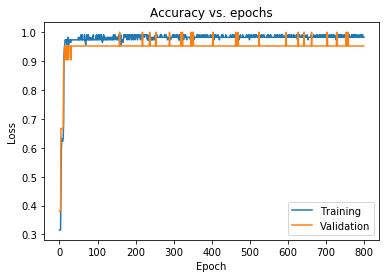

In [65]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

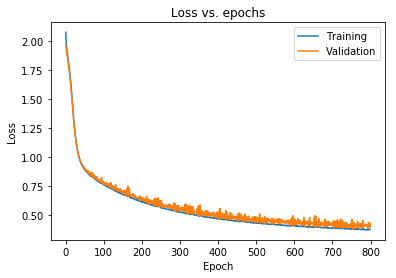

In [66]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
You will now incorporate callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.

In [67]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = 'min', patience = 30)
    reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 20)
    
    return early_stop, reduce
    

Run the cell below to instantiate and train the regularised model with the callbacks.

In [68]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [69]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for our new model.

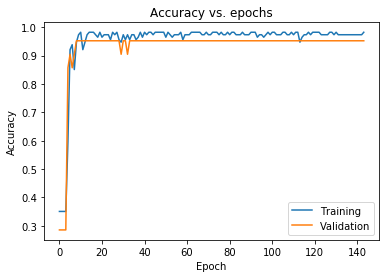

In [70]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

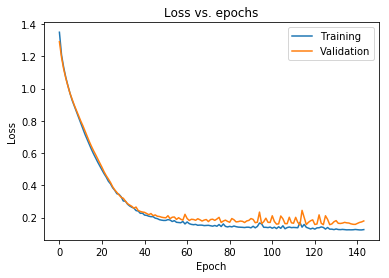

In [71]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [72]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.155
Test accuracy: 93.33%
